In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix, classification_report,roc_auc_score

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
heart_data = pd.read_csv("https://storage.googleapis.com/dimensionless/ML_with_Python/Chapter%205/heart.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


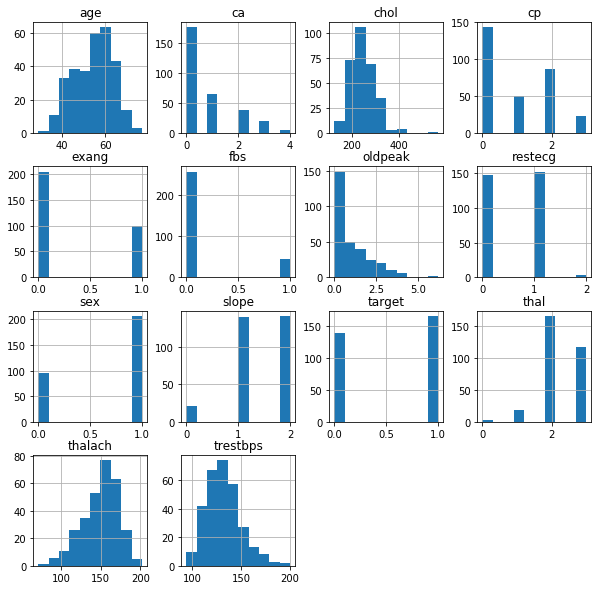

In [7]:
heart_data.hist(figsize=(10,10));

In [8]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
y = heart_data['target']
X = heart_data.drop(['target'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [7]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model_bag = 

In [11]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [12]:
heart_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
Baseline = 165/313

In [14]:
Baseline

0.5271565495207667

In [15]:
hd_model = DecisionTreeClassifier(max_depth=4)

In [16]:
hd_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
hd_model.score(X_train,y_train)

0.910377358490566

In [18]:
y_pred_train = hd_model.predict(X_train)

In [19]:
confusion_matrix(y_train,y_pred_train)

array([[ 86,  11],
       [  8, 107]])

In [20]:
y_pred_test = hd_model.predict(X_test)
y_pred_test

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0])

In [21]:
confusion_matrix(y_test,y_pred_test)

array([[30, 11],
       [ 9, 41]])

In [22]:
model1 = DecisionTreeClassifier(max_depth=4,random_state=100)

In [23]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [24]:
parameters ={'max_depth':{1,2,3,4,5,6,7,8}}

In [25]:
grid = GridSearchCV(model1,parameters,)

ValueError: Parameter values for parameter (max_depth) need to be a sequence(but not a string) or np.ndarray.

In [26]:
import sklearn

In [27]:
sklearn.__version__


'0.21.3'

In [28]:
from sklearn import tree

[Text(158.43214285714285, 195.696, 'cp <= 0.5\ngini = 0.496\nsamples = 212\nvalue = [97, 115]'),
 Text(77.72142857142858, 152.208, 'oldpeak <= 0.7\ngini = 0.373\nsamples = 101\nvalue = [76, 25]'),
 Text(47.82857142857143, 108.72, 'ca <= 0.5\ngini = 0.494\nsamples = 38\nvalue = [17, 21]'),
 Text(23.914285714285715, 65.232, 'chol <= 174.5\ngini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(11.957142857142857, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(35.871428571428574, 21.744, 'gini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(71.74285714285715, 65.232, 'sex <= 0.5\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(59.785714285714285, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(83.7, 21.744, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(107.61428571428571, 108.72, 'trestbps <= 106.0\ngini = 0.119\nsamples = 63\nvalue = [59, 4]'),
 Text(95.65714285714286, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(119.57142857142857, 65.232, 'sl

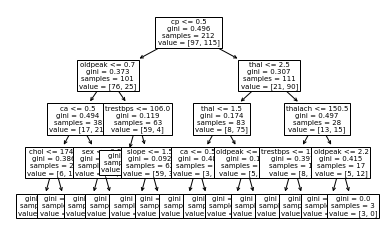

In [30]:
tree.plot_tree(model1.fit(X_train,y_train),feature_names=X_train.columns,fontsize=7)